In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [3]:
raw_data=pd.read_csv('train.csv')
raw_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
numerical_columns=raw_data.describe().columns    ### for now we use numerical data

In [5]:
raw_data_targets=raw_data['SalePrice']

## 1. Visualization

First of all we have to check which features to use as there are countless columns and i am surely most of them will be reduntant as they will not add any usefulness to the model.For that, we can employ couple of techniques:

1. Intitution based selection ( We can check which features are normally important as seen by various house owners)

2. We can select some features from heatmap by checking the ones having most high correlation with target (Sale Price) Variable

3. We can then add few features by combining similar ones or drop one of the similar ones

4. Then we can move on to check the conditions for Regression which are 1) Linearity 2) No Homoscedacsity 3) No Multicollinearity 4) Normality of dependent variable 

All of this will be done by using visualization techniques coupled with statistical methods

In [7]:
raw_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

For now based on intution i can select:

LotFrontage, LotArea, Utilities, OverallQual (this includes consition1,condition2) , YearBuilt, BsmtCond, GarageArea, PoolArea

This is my first selection , further during our analysis we will select some more and drop some of these too.

In [8]:
Selection_1=['LotFrontage','LotArea','Utilities','OverallQual','YearBuilt','BsmtCond','GarageArea','PoolArea']

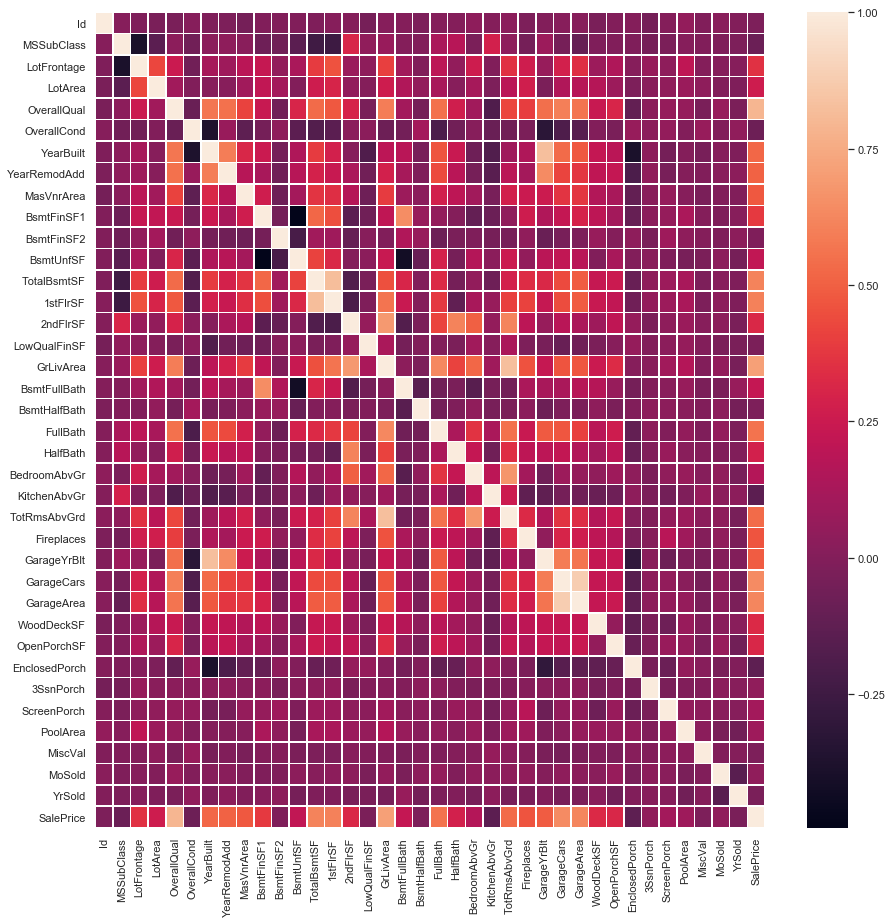

In [9]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(raw_data.corr(),linewidth=.5,ax=ax)

From this heatmap we can select few features:

Highest negative Correlation : KitchenAbvGr

Highest Positive Correlation : OverallQual, GarageCars,GarageArea, GrLivArea

In [10]:
Selection_2=['KitchenAbvGr','OverallQual','GarageArea','GrLivArea']   ### Becuase garage cars and garage area are same

In [11]:
Fetaures_List=Selection_1 + Selection_2

In [12]:
Fetaures_List.remove('OverallQual')    ### It was twice in the list

In [13]:
Fetaures_List.remove('GarageArea')

In [14]:
Fetaures_List

['LotFrontage',
 'LotArea',
 'Utilities',
 'YearBuilt',
 'BsmtCond',
 'PoolArea',
 'KitchenAbvGr',
 'OverallQual',
 'GarageArea',
 'GrLivArea']

Let's check their correlation with SalePrice

In [15]:
raw_data[Fetaures_List + ['SalePrice']].corr()

,LotFrontage,LotArea,YearBuilt,PoolArea,KitchenAbvGr,OverallQual,GarageArea,GrLivArea,SalePrice
LotFrontage,1.000000,0.426095,0.123349,0.206167,-0.006069,0.251646,0.344997,0.402797,0.351799
LotArea,0.426095,1.000000,0.014228,0.077672,-0.017784,0.105806,0.180403,0.263116,0.263843
YearBuilt,0.123349,0.014228,1.000000,0.004950,-0.174800,0.572323,0.478954,0.199010,0.522897
PoolArea,0.206167,0.077672,0.004950,1.000000,-0.014525,0.065166,0.061047,0.170205,0.092404
KitchenAbvGr,-0.006069,-0.017784,-0.174800,-0.014525,1.000000,-0.183882,-0.064433,0.100063,-0.135907
OverallQual,0.251646,0.105806,0.572323,0.065166,-0.183882,1.000000,0.562022,0.593007,0.790982
GarageArea,0.344997,0.180403,0.478954,0.061047,-0.064433,0.562022,1.000000,0.468997,0.623431
GrLivArea,0.402797,0.263116,0.199010,0.170205,0.100063,0.593007,0.468997,1.000000,0.708624
SalePrice,0.351799,0.263843,0.522897,0.092404,-0.135907,0.790982,0.623431,0.708624,1.000000


We can see that PoolArea has almost no correlation with the SalePrice so we are gonna drop it. KitchenAbvGr is also close to zero but among all the features it is the most neagtive so we are gonna keep it.

In [16]:
Fetaures_List.remove('PoolArea')

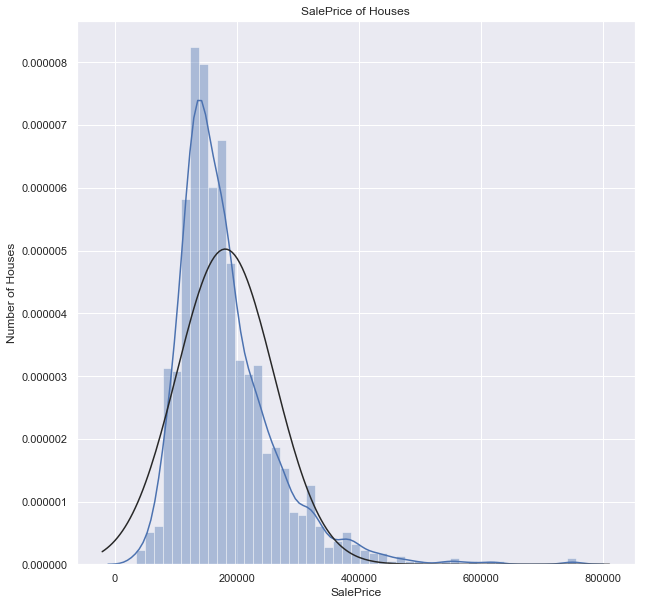

In [17]:
from scipy.stats import norm
fig = plt.figure(figsize=(10,10)) # define plot area
ax = fig.gca() # define axis 
ax.set_title('SalePrice of Houses')# Give the plot a main title
ax.set_xlabel('Price Rannge') # Set text for the x axis
ax.set_ylabel('Number of Houses')# Set text for y-axis
sns.distplot(raw_data['SalePrice'],ax=ax,fit=norm)

In [18]:
from scipy.stats import kurtosis
print("Skew:",raw_data['SalePrice'].skew(),
      "Kurtosis:",raw_data['SalePrice'].kurtosis())

Skew: 1.8828757597682129 Kurtosis: 6.536281860064529


So as also shown from above figure it has a right(positive) skew which is confirmed by the number and kurtosis which is the measure of tails show that it has thinner tails.A kurtosis of  Standard Normal Distribution is 3.So we shall employ a technique to change it to normal distribution

In [19]:
raw_data['SalePrice']= np.log(raw_data['SalePrice'])   ### The log or sqroot of positive numbers remove positive skew

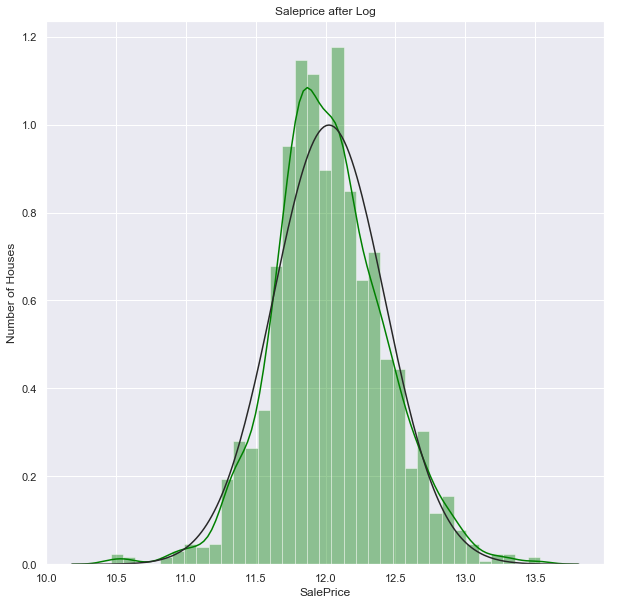

In [20]:
fig=plt.figure(figsize=(10,10))
ax=fig.gca()
ax.set_title('Saleprice after Log')
ax.set_xlabel('ln(SalePrice)')
ax.set_ylabel('Number of Houses')
sns.distplot(raw_data['SalePrice'],ax=ax,fit=norm,color='green')

Now let's check the homoscedasticity of the variables and also spot some outliers as they tend to disturb regression results

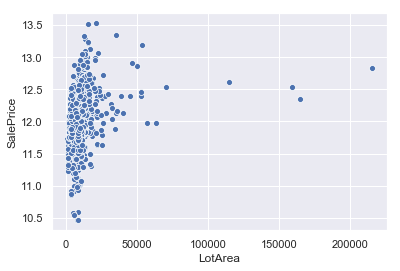

In [21]:
sns.scatterplot(y=raw_data['SalePrice'],x=raw_data['LotArea'])

We can see that LotArea > 100,000 are just outliers so we can remove them. Also data is not in cone or diamond shape so there is no homoscedasticity.

In [22]:
for i in range (raw_data.shape[0]):
    if raw_data['LotArea'][i] > 100000:
        raw_data.drop(index=i,inplace=True)

In [23]:
raw_data[Fetaures_List].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 9 columns):
LotFrontage     1200 non-null float64
LotArea         1456 non-null int64
Utilities       1456 non-null object
YearBuilt       1456 non-null int64
BsmtCond        1419 non-null object
KitchenAbvGr    1456 non-null int64
OverallQual     1456 non-null int64
GarageArea      1456 non-null int64
GrLivArea       1456 non-null int64
dtypes: float64(1), int64(6), object(2)
memory usage: 153.8+ KB


In [24]:
raw_data_targets=raw_data['SalePrice']

### Data Preprocessing and Modelling

In [25]:
var=raw_data['LotFrontage'].median()
raw_data['LotFrontage'].fillna(value=var,inplace=True)

In [26]:
raw_data['BsmtCond'].value_counts()

TA    1307
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [27]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
raw_data_1=encoder.fit_transform(raw_data['Utilities'])

In [28]:
raw_data['Utilities']=raw_data_1

In [29]:
raw_data_2=pd.get_dummies(raw_data['BsmtCond'],dummy_na=True)

In [30]:
raw_data['BsmtCond']=raw_data_2

### 1. Base Model, Multivariate Regression

In [31]:
train_X=raw_data[Fetaures_List]
train_Y=raw_data_targets

In [62]:
from sklearn.model_selection import cross_val_score

In [32]:
from sklearn.linear_model import LinearRegression
Linear_multivariate=LinearRegression()
Linear_multivariate.fit(train_X,train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [63]:
MAE= cross_val_score(Linear_multivariate,train_X,train_Y,cv=10,scoring='neg_mean_absolute_error')

In [65]:
MAE.mean()

-0.11724092218433779

### Ridge Regression

We should check for VIF score > 5 to see if there is any multicollinearity there.And then apply ridge regression.
For VIF score, use statsmodels library

In [66]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=0.1)
ridge_reg.fit(train_X,train_Y)
Ridge_Mae=cross_val_score(ridge_reg,train_X,train_Y,cv=10,scoring='neg_mean_absolute_error')
Ridge_Mae.mean()

-0.11724317913795598

The result are almost same so let's check with Lasso regression

### Lasso Regression

In [67]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=0.01)
lasso_reg.fit(train_X,train_Y)
lasso_Mae=cross_val_score(lasso_reg,train_X,train_Y,cv=10,scoring='neg_mean_absolute_error')
lasso_Mae.mean()

-0.11951543287142548

By far the linear simple regression has better results so we are going to predict through that model

What my reading is that:

1) we might be using some extra variables so we have to check R-squared for every extra varaiable and then use the minimum viable number of features

### Test Data 

In [36]:
test_data=pd.read_csv('test.csv')
test_data[Fetaures_List].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 9 columns):
LotFrontage     1232 non-null float64
LotArea         1459 non-null int64
Utilities       1457 non-null object
YearBuilt       1459 non-null int64
BsmtCond        1414 non-null object
KitchenAbvGr    1459 non-null int64
OverallQual     1459 non-null int64
GarageArea      1458 non-null float64
GrLivArea       1459 non-null int64
dtypes: float64(2), int64(5), object(2)
memory usage: 102.7+ KB


In [37]:
test_data['LotFrontage'].median()

67.0

In [38]:
test_data['LotFrontage'].fillna(value=67.0,inplace=True)

In [39]:
cols=['Utilities','BsmtCond']
for columns in cols:
    
    test_data[columns]=pd.get_dummies(test_data[columns],dummy_na=True)

In [40]:
test_data['GarageArea'].fillna(value=0,inplace=True)

In [41]:
test_X=test_data[Fetaures_List].values

In [42]:
Predictions=Linear_multivariate.predict(test_X)

In [43]:
Predictions=np.e**(Predictions)

In [44]:
Predictions

array([114945.24796294, 129668.45957702, 144322.30314829, ...,
       127236.90913912, 104189.94859131, 199801.20159539])

In [45]:
New_file=pd.DataFrame()
New_file['Id']=test_data['Id']
New_file['SalePrice']=Predictions.astype(int)

In [46]:
New_file.to_csv('LatestPredictions.csv',index=False)        ### Alot of variance in this model

This model had alot of variance as prediction scores were 0.22 which are alot worse than our training model scores of 0.11

#### So now we move on to XGBoost, CatBoost and lightboost and then to stacking.
#### Since our varinace is large we should use bagging which decreases variance instead of boosting.

### Bagging Regresssor

In [47]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import RandomizedSearchCV

In [48]:
B_regressor=BaggingRegressor(n_jobs=-1,base_estimator=Lasso(alpha=0.01),bootstrap=True)

In [49]:
B_regressor.fit(train_X,train_Y)

BaggingRegressor(base_estimator=Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=-1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [69]:
BRegressor_Mae= cross_val_score(B_regressor,train_X,train_Y,cv=10,scoring='neg_mean_absolute_error')
BRegressor_Mae.mean()

-0.11951378063196179

#### It has same MAE as Lasso but due to bagging we hope it has less variance.

In [51]:
Predictions_2=B_regressor.predict(test_X)
Predictions_2=np.e**(Predictions_2)
New_file['SalePrice']=Predictions_2.astype(int)
New_file.to_csv('LatestPredictions_2.csv',index=False)

#### It drastically improved the variance yet it varied by 6 points

Let's use decision tree which is a weak regressor but has less bias with this bagging technique.

In [70]:
B_regressor_2=BaggingRegressor(n_jobs=-1,bootstrap=True)
B_regressor_2.fit(train_X,train_Y)
Regressor_2_Mae=cross_val_score(B_regressor_2,train_X,train_Y,cv=10,scoring='neg_mean_absolute_error')
Regressor_2_Mae.mean()

-0.12138486384902358

#### This is more biased than others. So decison trees are not hepful

In [53]:
Predictions_3=B_regressor_2.predict(test_X)
Predictions_3=np.e**(Predictions_3)
New_file['SalePrice']=Predictions_3.astype(int)
New_file.to_csv('LatestPredictions_3.csv',index=False)

It worked slightly worse than other bagging technique.Here we could have used Gridsearch to opt between parameters and base estimators to improve results.

### Voting Regressor

#### I have not been able to import Voting Regressor so lets do the averaging and weighted averaging Manually

#### 1. Averaging

In [54]:
Final_Predictions= (Predictions + Predictions_2 + Predictions_3) / 3

In [55]:
Final_Predictions

array([125169.5481638 , 145227.52099823, 159333.091147  , ...,
       142600.06265247, 108869.46324486, 223659.47679963])

In [56]:
New_file['SalePrice']=Final_Predictions.astype(int)
New_file.to_csv('Average_Voting.csv',index=False)

#### Slightly better than last prediction (0.007 ) imporovement in MAE 

#### 2. Weighted Averaging

#### Here let;s try two things

1. Give more weightage to less bias model
2. Give more wightage to less varied model

In [57]:
Final_Predictions_1= (Predictions * 0.25) + (0.25 * Predictions_2 )+ (0.5 * Predictions_3) / 3

In [58]:
New_file['SalePrice']=Final_Predictions_1.astype(int)
New_file.to_csv('Weighted_Average.csv',index=False)

#### It was a disaster as MAE jumped to .49 from 0.17

In [59]:
Final_Predictions_2= ((0.4* Predictions ) + (0.4 * Predictions_2 ) + (0.2 * Predictions_3)) / 3

In [60]:
New_file['SalePrice']=Final_Predictions_2.astype(int)
New_file.to_csv('Weighted_Average_2.csv',index=False)

#### it came back to .17 but not improving from there.